### Importación de datos



In [167]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()
tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


# 1. Análisis de facturación



- En este paso, iteraremos sobre las ***tiendas*** para sumar la columna `precio` y poder calcular la facturacion

La facturacion de tienda1 es de 1150880400.0
La facturacion de tienda2 es de 1116343500.0
La facturacion de tienda3 es de 1098019600.0
La facturacion de tienda4 es de 1038375700.0


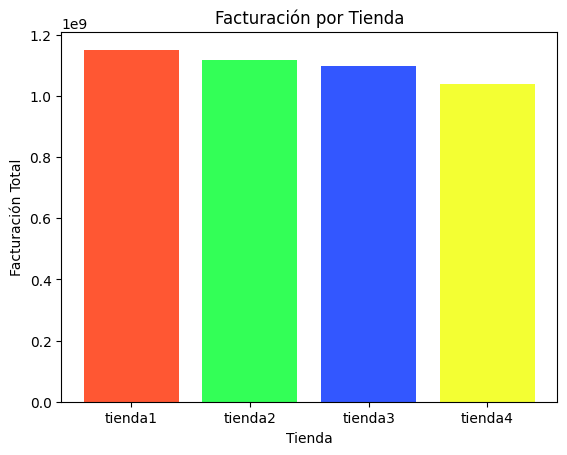

In [168]:
tiendas = [tienda1, tienda2, tienda3, tienda4]
tiendas_string = ['tienda1', 'tienda2', 'tienda3', 'tienda4']
facturacion = []

for i,tienda in enumerate(tiendas):
    total = tienda['Precio'].sum()
    facturacion.append(total)
    print(f'La facturacion de tienda{i+1} es de {total}')

fig, ax = plt.subplots()
ax.bar(tiendas_string, facturacion, color=['#FF5733', '#33FF57', '#3357FF', '#F3FF33'])
plt.title('Facturación por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación Total')

plt.show()

# 2. Ventas por categoría

- En esta ocasion, agruparemos por cantidad de productos vendidos, basandonos en su **categoria**

In [169]:
cat_cant =tienda1["Categoría del Producto"].value_counts().reset_index().rename(columns={'Categoría del Producto': 'Categoria', 'count': 'Cantidad'})

cat_cant

,Categoria,Cantidad
0,Muebles,465
1,Electrónicos,448
2,Juguetes,324
3,Electrodomésticos,312
4,Deportes y diversión,284
5,Instrumentos musicales,182
6,Libros,173
7,Artículos para el hogar,171


**********
Tienda1
**********


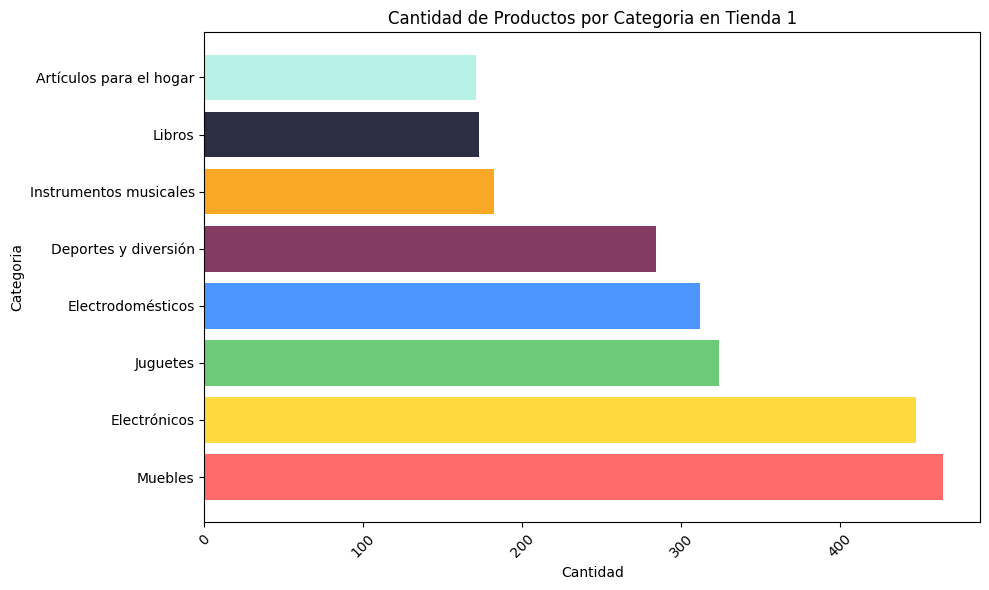

,Categoria,Cantidad
0,Muebles,465
1,Electrónicos,448
2,Juguetes,324
3,Electrodomésticos,312
4,Deportes y diversión,284
5,Instrumentos musicales,182
6,Libros,173
7,Artículos para el hogar,171


In [170]:
def categoria_cantidad(tienda,i):
    print("*"*10)
    print(f"Tienda{i}")
    print("*"*10)
    try:
        cat_cant = tienda["Categoría del Producto"].value_counts().reset_index().rename(columns={'Categoría del Producto': 'Categoria', 'count': 'Cantidad'})
        plt.figure(figsize=(10, 6))
        plt.barh(cat_cant['Categoria'], cat_cant['Cantidad'], color=["#FF6B6B","#FFD93D","#6BCB77","#4D96FF", "#843B62","#F9A826","#2C2E43","#B8F2E6", "#F67280","#355C7D" ])
        plt.title(f'Cantidad de Productos por Categoria en Tienda {i}')
        plt.ylabel('Categoria')
        plt.xlabel('Cantidad')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print("No se ha podido calcular la cantidad de productos por categoria",e)
        
    return cat_cant

categoria_cantidad(tienda1,1)

**********
Tienda2
**********


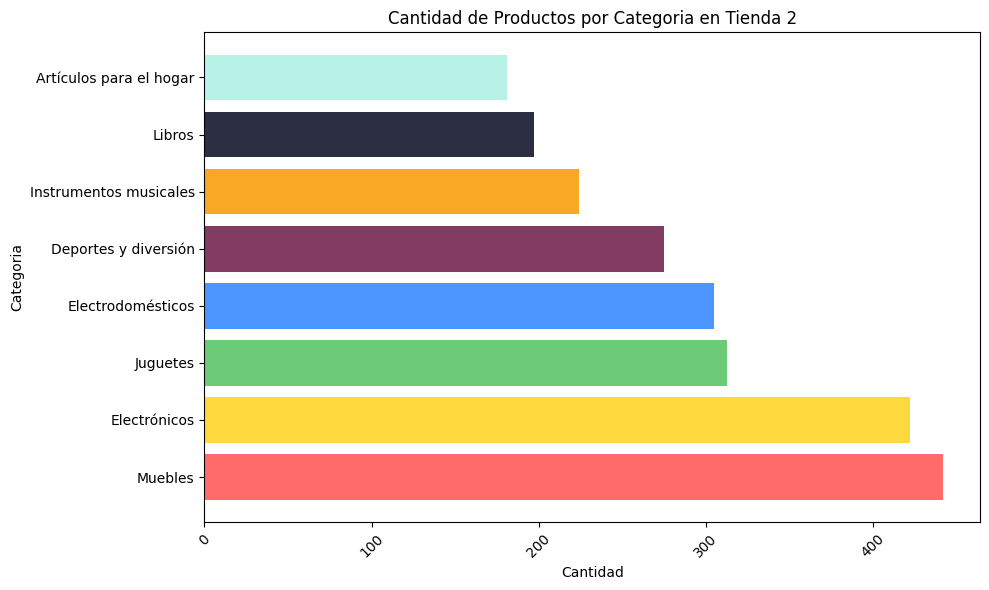

,Categoria,Cantidad
0,Muebles,442
1,Electrónicos,422
2,Juguetes,313
3,Electrodomésticos,305
4,Deportes y diversión,275
5,Instrumentos musicales,224
6,Libros,197
7,Artículos para el hogar,181


In [171]:
categoria_cantidad(tienda2,2)

**********
Tienda3
**********


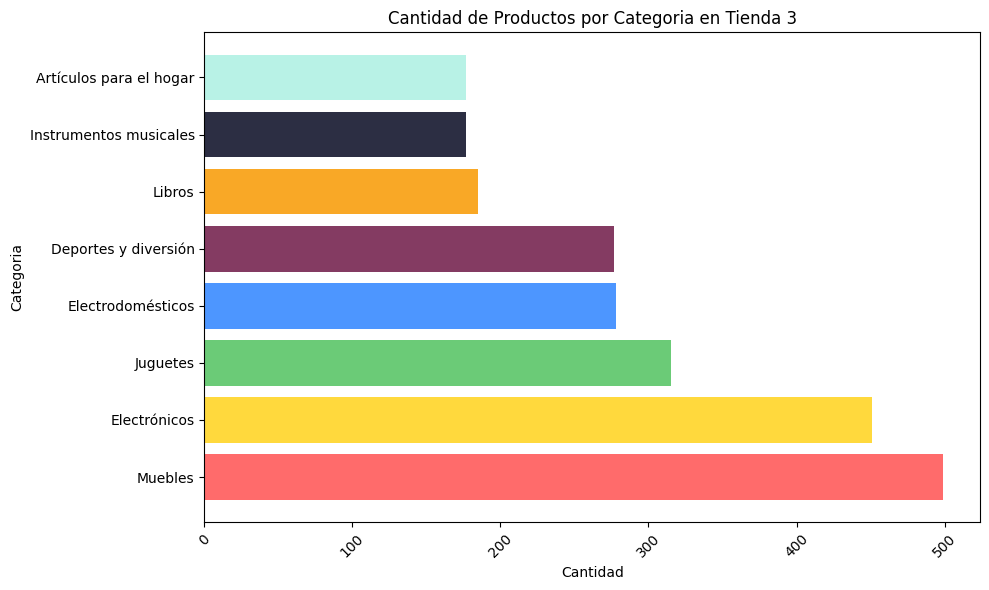

,Categoria,Cantidad
0,Muebles,499
1,Electrónicos,451
2,Juguetes,315
3,Electrodomésticos,278
4,Deportes y diversión,277
5,Libros,185
6,Instrumentos musicales,177
7,Artículos para el hogar,177


In [172]:
categoria_cantidad(tienda3,3)

**********
Tienda4
**********


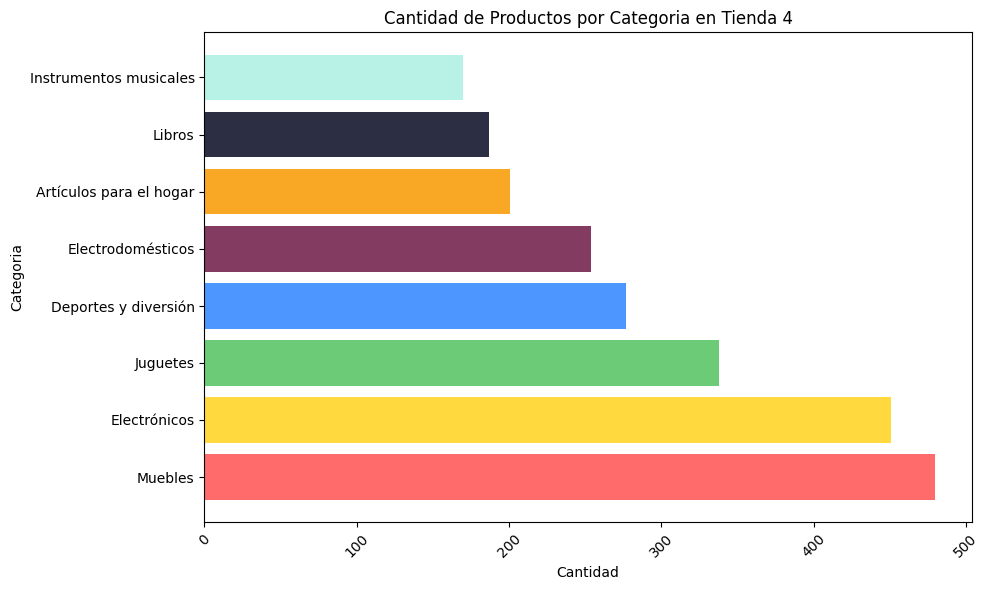

,Categoria,Cantidad
0,Muebles,480
1,Electrónicos,451
2,Juguetes,338
3,Deportes y diversión,277
4,Electrodomésticos,254
5,Artículos para el hogar,201
6,Libros,187
7,Instrumentos musicales,170


In [173]:
categoria_cantidad(tienda4,4)

# 3. Calificación promedio de la tienda


- Calcularemos el promedio de la columna `Calificacion`

La calificacion de tienda1 es de 3.98
La calificacion de tienda2 es de 4.04
La calificacion de tienda3 es de 4.05
La calificacion de tienda4 es de 4.0


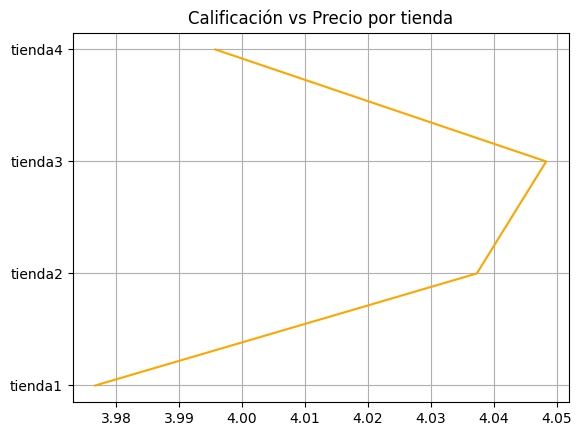

In [184]:
calificacion = []
for i,tienda in enumerate(tiendas):
    total = tienda['Calificación'].mean()
    calificacion.append(total)
    print(f'La calificacion de tienda{i+1} es de {round(total,2)}')

fig, ax = plt.subplots()
plt.plot(calificacion, tiendas_string, color='orange')
plt.grid()
plt.title(f'Calificación vs Precio por tienda')
plt.show()

# 4. Productos más y menos vendidos

In [175]:
tienda1.sample()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
874,Secadora de ropa,Electrodomésticos,1012600.0,52100.0,27/02/2021,Camila Rivera,Bogotá,5,Tarjeta de crédito,3,4.60971,-74.08175


In [176]:
df =  tienda1['Producto'].value_counts(ascending=False).reset_index()
max = df["count"].to_list()[0]
min = df["count"].to_list()[-1]


In [177]:
for i,tienda in enumerate(tiendas):
    print("-"*100)
    print("*"*10)
    print(f"Tienda{i+1}")
    print("*"*10,"\n")
    
    df =  tienda['Producto'].value_counts(ascending=False).reset_index()
    max = df["count"].to_list()[0]
    min = df["count"].to_list()[-1]
    products_max = ",".join(df[df['count'] == max]['Producto'].to_list()) 
    products_min = ",".join(df[df['count'] == min]['Producto'].to_list()) 
    print(f"Los productos mas vendidos de tienda {i+1} son {products_max} con un total de {max} ventas")
    print(f"Los productos menos vendidos de tienda {i+1} son {products_min} con un total de {min} ventas \n \n")
    print("-"*100)
     

----------------------------------------------------------------------------------------------------
**********
Tienda1
********** 

Los productos mas vendidos de tienda 1 son Microondas,TV LED UHD 4K,Armario con un total de 60 ventas
Los productos menos vendidos de tienda 1 son Auriculares con micrófono,Celular ABXY con un total de 33 ventas 
 

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
**********
Tienda2
********** 

Los productos mas vendidos de tienda 2 son Iniciando en programación con un total de 65 ventas
Los productos menos vendidos de tienda 2 son Juego de mesa con un total de 32 ventas 
 

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
**********
Tienda3
********** 


# 5. Envío promedio por tienda

In [178]:
for i,tienda in enumerate(tiendas):
    total = tienda['Costo de envío'].mean()
    facturacion.append(total)
    print(f'El costo de envío de tienda{i+1} es de {total}')

El costo de envío de tienda1 es de 26018.60958033065
El costo de envío de tienda2 es de 25216.235693090293
El costo de envío de tienda3 es de 24805.680373039424
El costo de envío de tienda4 es de 23459.457167090754
